In [64]:
import pandas as pd
from pycountry_convert import country_alpha2_to_continent_code
import matplotlib.pyplot as pl
import matplotlib.ticker as ticker
import seaborn as sns

In [97]:
df = pd.read_csv("all-coordinates.csv")
df['country_short'][df['country_short'] == 'VA'] = 'IT'
df['continent'] = df.country_short.apply(country_alpha2_to_continent_code)
df.to_csv("kepler-publication-coordinates.csv")

/home/gb/bin/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [89]:
df = df[(df.year > 2009) & (df.year < 2019) & (df.science == 'astrophysics')]

In [90]:
summ = df.groupby(['year', 'continent']).count()['bibcode']
summ

year  continent
2010  AS             1
      EU            25
      NA            20
      OC             4
2011  AF             7
      AS             2
      EU            48
      NA            30
      OC             4
2012  AF             4
      AS             5
      EU            54
      NA            36
      OC             2
      SA             1
2013  AS             5
      EU            37
      NA            32
2014  AF             3
      AS            14
      EU            68
      NA            32
      SA             5
2015  AF             7
      AS            23
      EU           105
      NA            38
      OC             4
      SA             4
2016  AF             4
      AS            19
      EU            88
      NA            49
      OC             6
      SA             2
2017  AF             2
      AS            24
      EU            97
      NA            57
      OC             5
      SA             9
2018  AF             6
      AS          

In [91]:
# Normalize by total publications per year
norm = 100 * summ / df.groupby('year').count()['bibcode']
# fill missing values with zeros:
norm = norm.reindex(pd.MultiIndex.from_product([norm.index.levels[0], norm.index.levels[1]]), fill_value=0)
norm

2010  AF     0.000000
      AS     2.000000
      EU    50.000000
      NA    40.000000
      OC     8.000000
      SA     0.000000
2011  AF     7.692308
      AS     2.197802
      EU    52.747253
      NA    32.967033
      OC     4.395604
      SA     0.000000
2012  AF     3.921569
      AS     4.901961
      EU    52.941176
      NA    35.294118
      OC     1.960784
      SA     0.980392
2013  AF     0.000000
      AS     6.756757
      EU    50.000000
      NA    43.243243
      OC     0.000000
      SA     0.000000
2014  AF     2.459016
      AS    11.475410
      EU    55.737705
      NA    26.229508
      OC     0.000000
      SA     4.098361
2015  AF     3.867403
      AS    12.707182
      EU    58.011050
      NA    20.994475
      OC     2.209945
      SA     2.209945
2016  AF     2.380952
      AS    11.309524
      EU    52.380952
      NA    29.166667
      OC     3.571429
      SA     1.190476
2017  AF     1.030928
      AS    12.371134
      EU    50.000000
      NA  

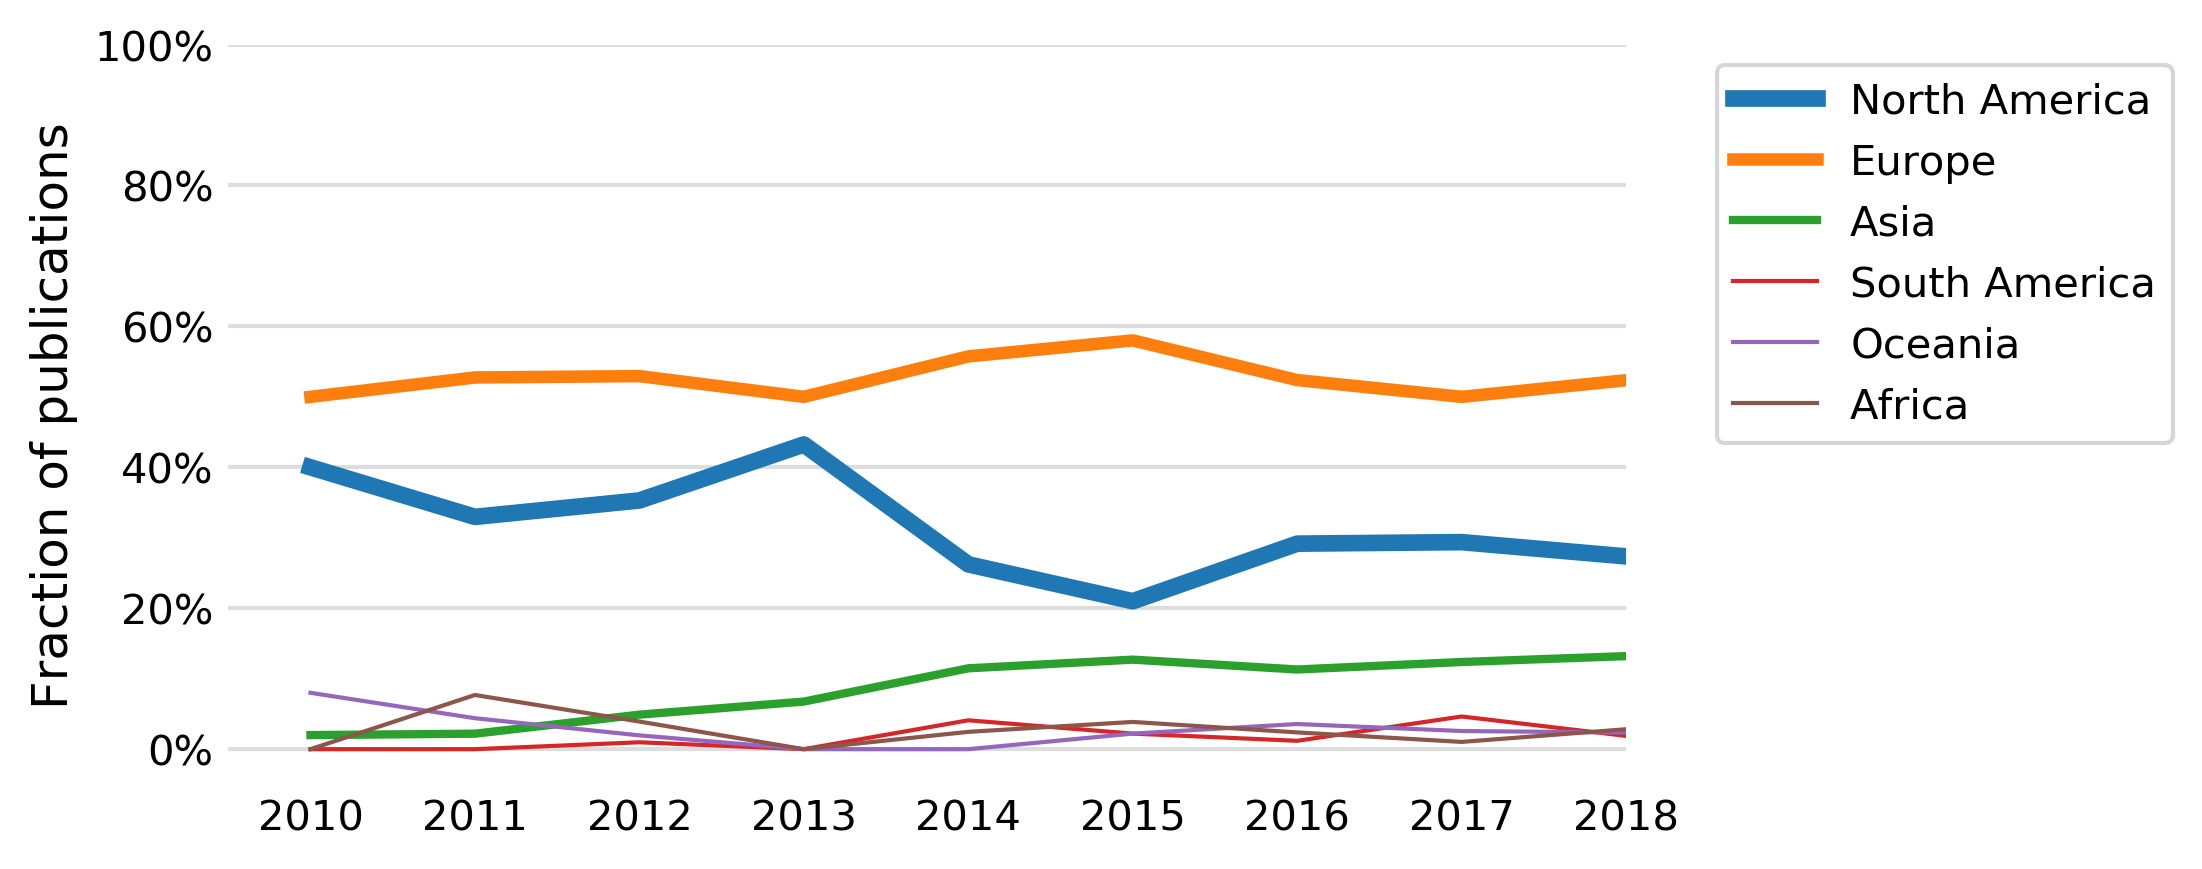

In [95]:
labels = {'NA': 'North America', 'EU': 'Europe', 'AS': 'Asia',
          'AF': 'Africa', 'SA': 'South America', 'OC': 'Oceania'}
width = {'NA': 4, 'EU': 3, 'AS': 2, 'SA': 1, 'OC': 1, 'AF': 1}

fig = pl.figure(figsize=(7.5, 3.), dpi=300)
ax = fig.add_subplot(111)
ax.tick_params(length=0)
[ax.spines[loc].set_visible(False) for loc in ['top', 'right', 'bottom', 'left']]
pl.hlines(range(0, 101, 20), xmin=2000, xmax=2030, color='#dddddd', lw=1)

for continent in ['NA', 'EU', 'AS', 'SA', 'OC', 'AF']:
    pl.plot(norm.xs(continent, level=1).index.values,
            norm.xs(continent, level=1).values,
            label=labels[continent],
            linewidth=width[continent])

pl.xlim([2009.5, 2018])
pl.ylim([-5, 100])
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%d%%"))
pl.xticks(range(2010, 2019, 1))
pl.yticks(range(0, 101, 20))
pl.legend(loc='upper left', bbox_to_anchor=(1.05, 1), ncol=1)
pl.ylabel("Fraction of publications", size=12)
pl.tight_layout()
pl.savefig("astrophysics-publications-by-continent.png")